In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno 

In [ ]:
"""
ok2017 = pd.read_csv('file:///home/rachel/Documents/Preeclampsia_Research/Data/Oklahom_PUDF_2020.08.27/2017%20IP/pudf_cd.txt',
            sep=",")
ok2018 = pd.read_csv('file:///home/rachel/Documents/Preeclampsia_Research/Data/Oklahom_PUDF_2020.08.27/2018%20IP/pudf_cdv2.txt',sep=",")
"""

parent = os.path.dirname(os.getcwd())
dataPath2017 = os.path.join(parent, r"Data/Oklahom_PUDF_2020.08.27/2017%20IP/pudf_cd.txt")
dataPath2018 = os.path.join(parent, r"Data/Oklahom_PUDF_2020.08.27/2018%20IP/pudf_cdv2.txt")


ok2017 = pd.read_csv('file://' + dataPath2017)
ok2018 = pd.read_csv('file://' + dataPath2018)

# Dropping unneeded columns
ok2017.drop(columns=['pk_pudf', 'id_hups', 'cd_hospital_type', 'cd_admission_type_src', 'no_total_chgs',
                     'cd_drg_hci', 'cd_mdc', 'cd_ecode_cause_1',
                     'cd_ecode_cause_2', 'cd_ecode_cause_3'], inplace=True)
ok2018.drop(columns=['pk_pudf', 'id_hups', 'cd_hospital_type', 'cd_admission_type_src', 'no_total_chgs',
                     'cd_drg_hci', 'cd_mdc', 'cd_ecode_cause_1',
                     'cd_ecode_cause_2', 'cd_ecode_cause_3'], inplace=True)

ok2017.columns = ['State', 'Zip', 'County', 'Sex', 'Race', 'Marital_status', 'Age', 'admit_year',
                  'admit_month', 'admit_day',
                  'discharge_year', 'discharge_month', 'discharge_day', 'Length_of_stay', 'Status',
                  'Insurance', 'pdx', 'dx1', 'dx2', 'dx3',
                  'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14', 'dx15',
                  'ppoa', 'poa1', 'poa2', 'poa3', 'poa4', 'poa5',
                  'poa6', 'poa7', 'poa8', 'poa9', 'poa10', 'poa11', 'poa12', 'poa13',
                  'poa14', 'poa15', 'ppx', 'px1', 'px2', 'px3', 'px4', 'px5', 'px6',
                  'px7', 'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14', 'px15']

ok2018.columns = ['State', 'Zip', 'County', 'Sex', 'Race', 'Marital_status', 'Age', 'admit_year',
                  'admit_month', 'admit_day',
                  'discharge_year', 'discharge_month', 'discharge_day', 'Length_of_stay', 'Status',
                  'Insurance', 'pdx', 'dx1', 'dx2', 'dx3',
                  'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14', 'dx15',
                  'ppoa', 'poa1', 'poa2', 'poa3', 'poa4', 'poa5',
                  'poa6', 'poa7', 'poa8', 'poa9', 'poa10', 'poa11', 'poa12', 'poa13',
                  'poa14', 'poa15', 'ppx', 'px1', 'px2', 'px3', 'px4', 'px5', 'px6',
                  'px7', 'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14', 'px15']

ok2017 = (ok2017.loc[(ok2017['pdx'].str.startswith('Z37'))
                     | ok2017['dx1'].str.startswith('Z37')
                     | ok2017['dx2'].str.startswith('Z37')
                     | ok2017['dx3'].str.startswith('Z37')
                     | ok2017['dx4'].str.startswith('Z37')
                     | ok2017['dx5'].str.startswith('Z37')
                     | ok2017['dx6'].str.startswith('Z37')
                     | ok2017['dx8'].str.startswith('Z37')
                     | ok2017['dx9'].str.startswith('Z37')
                     | ok2017['dx10'].str.startswith('Z37')
                     | ok2017['dx11'].str.startswith('Z37')
                     | ok2017['dx12'].str.startswith('Z37')
                     | ok2017['dx13'].str.startswith('Z37')
                     | ok2017['dx14'].str.startswith('Z37')
                     | ok2017['dx15'].str.startswith('Z37')])

ok2018 = (ok2018.loc[(ok2018['pdx'].str.startswith('Z37'))
                     | ok2018['dx1'].str.startswith('Z37')
                     | ok2018['dx2'].str.startswith('Z37')
                     | ok2018['dx3'].str.startswith('Z37')
                     | ok2018['dx4'].str.startswith('Z37')
                     | ok2018['dx5'].str.startswith('Z37')
                     | ok2018['dx6'].str.startswith('Z37')
                     | ok2018['dx8'].str.startswith('Z37')
                     | ok2018['dx9'].str.startswith('Z37')
                     | ok2018['dx10'].str.startswith('Z37')
                     | ok2018['dx11'].str.startswith('Z37')
                     | ok2018['dx12'].str.startswith('Z37')
                     | ok2018['dx13'].str.startswith('Z37')
                     | ok2018['dx14'].str.startswith('Z37')
                     | ok2018['dx15'].str.startswith('Z37')])

# Fix missing values
ok2017['State'] = np.where(ok2017['State'] == '99', np.NaN, ok2017['State'])
ok2018['State'] = np.where(ok2018['State'] == '99', np.NaN, ok2018['State'])

ok2017['Zip'] = np.where(ok2017['Zip'] == 99999.0, np.NaN, ok2017['Zip'])
ok2018['Zip'] = np.where(ok2018['Zip'] == 99999.0, np.NaN, ok2018['Zip'])

ok2017['Marital_status'] = np.where(ok2017['Marital_status'] == 'U', np.NaN, ok2017['Marital_status'])
ok2018['Marital_status'] = np.where(ok2018['Marital_status'] == 'U', np.NaN, ok2018['Marital_status'])

ok2017['Sex'] = np.where(ok2017['Sex'] == 'U', np.NaN, ok2017['Sex'])
ok2018['Sex'] = np.where(ok2018['Sex'] == 'U', np.NaN, ok2018['Sex'])

ok2017['Age'] = np.where(ok2017['Age'] == '99', np.NaN, ok2017['Age'])
ok2018['Age'] = np.where(ok2018['Age'] == '99', np.NaN, ok2018['Age'])

ok2017['Status'] = np.where(ok2017['Status'] == '99', np.NaN, ok2017['Status'])
ok2018['Status'] = np.where(ok2018['Status'] == '99', np.NaN, ok2018['Status'])


ok2017['Insurance'].replace(3, 'Medicaid', inplace=True)
ok2017['Insurance'].replace(2, 'Medicare', inplace=True)
ok2017['Insurance'].replace(6, 'Self-pay', inplace=True)
ok2017['Insurance'].replace([1,4,5,7], 'Other Insurance', inplace=True)
ok2017['Insurance'].replace([9,11,14], np.NaN, inplace=True)

ok2018['Insurance'].replace(3, 'Medicaid', inplace=True)
ok2018['Insurance'].replace(2, 'Medicare', inplace=True)
ok2018['Insurance'].replace(6, 'Self-pay', inplace=True)
ok2018['Insurance'].replace([1,4,5,7], 'Other Insurance', inplace=True)
ok2018['Insurance'].replace([9,11,14], np.NaN, inplace=True)

"""
# Creating Insurance Binary Columns
ok2017['Medicaid'] = 0
ok2017['Medicare'] = 0
ok2017['Self-pay'] = 0
ok2017['Other Insurance'] = 0

# Creating Insurance Binary Columns
ok2018['Medicaid'] = 0
ok2018['Medicare'] = 0
ok2018['Self-pay'] = 0
ok2018['Other Insurance'] = 0

# Filling out appropriate Columns
ok2017['Medicaid'] = np.where(ok2017['Insurance'] == 3, 1,
                              ok2017['Medicaid'])  # Change to 1 if 1, otherwise leave as is
ok2017['Medicare'] = np.where(ok2017['Insurance'] == 2, 1, ok2017['Medicare'])
ok2017['Self-pay'] = np.where(ok2017['Insurance'] == 6, 1, ok2017['Self-pay'])
ok2017['Other Insurance'] = np.where(ok2017['Insurance'].isin([1, 4, 5, 7]), int(1),
                                     ok2017['Other Insurance'])

# For Missing Values, 9 is unknown in their dictionary
ok2017['Medicaid'] = np.where(ok2017['Insurance'] == 9, np.NaN,
                              ok2017['Medicaid'])  # Change to 1 if 1, otherwise leave as is
ok2017['Medicare'] = np.where(ok2017['Insurance'] == 9, np.NaN, ok2017['Medicare'])
ok2017['Self-pay'] = np.where(ok2017['Insurance'] == 9, np.NaN, ok2017['Self-pay'])
ok2017['Other Insurance'] = np.where(ok2017['Insurance'] == 9, np.NaN, ok2017['Other Insurance'])

# Filling out appropriate Columns
ok2018['Medicaid'] = np.where(ok2018['Insurance'] == 3, 1,
                              ok2018['Medicaid'])  # Change to 1 if 1, otherwise leave as is
ok2018['Medicare'] = np.where(ok2018['Insurance'] == 2, 1, ok2018['Medicare'])
ok2018['Self-pay'] = np.where(ok2018['Insurance'] == 6, 1, ok2018['Self-pay'])
ok2018['Other Insurance'] = np.where(ok2018['Insurance'].isin([1, 4, 5, 7]), int(1),
                                     ok2018['Other Insurance'])

# For Missing Values, 9 is unkown in their dictionary
ok2018['Medicaid'] = np.where(ok2018['Insurance'] == 9, np.NaN,
                              ok2018['Medicaid'])  # Change to 1 if 1, otherwise leave as is
ok2018['Medicare'] = np.where(ok2018['Insurance'] == 9, np.NaN, ok2018['Medicare'])
ok2018['Self-pay'] = np.where(ok2018['Insurance'] == 9, np.NaN, ok2018['Self-pay'])
ok2018['Other Insurance'] = np.where(ok2018['Insurance'] == 9, np.NaN, ok2018['Other Insurance'])

# Fixing incorrect values
ok2018['Medicaid'] = np.where(ok2018['Insurance'].isin([11, 14]), np.NaN,
                              ok2018['Medicaid'])  # Change to 1 if 1, otherwise leave as is
ok2018['Medicare'] = np.where(ok2018['Insurance'].isin([11, 14]), np.NaN, ok2018['Medicare'])
ok2018['Self-pay'] = np.where(ok2018['Insurance'].isin([11, 14]), np.NaN, ok2018['Self-pay'])
ok2018['Other Insurance'] = np.where(ok2018['Insurance'].isin([11, 14]), np.NaN, ok2018['Other Insurance'])

# Dropping Insurance column
ok2017.drop(columns=['Insurance'], inplace=True)
ok2018.drop(columns=['Insurance'], inplace=True)
"""




# Re-label Invalid gender rows
ok2017['Sex'] = ok2017['Sex'].replace('M', 'F')
ok2018['Sex'] = ok2018['Sex'].replace('M', 'F')

# Selecting appropriate age groups
ok2017 = ok2017.query('Age >= "01" & Age <= "50-54" | Age == "99"')
ok2018 = ok2018.query('Age >= "01" & Age <= "50-54" | Age == "99"')


# Re-label Race
ok2017['Race'].replace('W', 'White', inplace=True)
ok2017['Race'].replace('B', 'African American', inplace=True)
ok2017['Race'].replace('I', 'Native American', inplace=True)
ok2017['Race'].replace('O', 'Other/Unknown', inplace=True)

ok2018['Race'].replace('W', 'White', inplace=True)
ok2018['Race'].replace('B', 'African American', inplace=True)
ok2018['Race'].replace('I', 'Native American', inplace=True)
ok2018['Race'].replace('O', 'Other/Unknown', inplace=True)


# Keeping admit month as proxy for whether when they developed preeclampsia
ok2017.drop(columns=['admit_year', 'admit_day', 'discharge_month', 'discharge_year', 'discharge_day'],
            inplace=True)
ok2018.drop(columns=['admit_year', 'admit_day', 'discharge_month', 'discharge_year', 'discharge_day'],
            inplace=True)

# Re-label marriage status
ok2017['Marital_status'] = ok2017['Marital_status'].replace('M', 'Married')
ok2018['Marital_status'] = ok2018['Marital_status'].replace('M', 'Married')
ok2017['Marital_status'] = ok2017['Marital_status'].replace('N', 'Unmarried')
ok2018['Marital_status'] = ok2018['Marital_status'].replace('N', 'Unmarried')

# A list of relevant columns
diagnosisColumns = ['pdx', 'dx1', 'dx2', 'dx3',
                    'dx4', 'dx5', 'dx6', 'dx7',
                    'dx8', 'dx9', 'dx10', 'dx11',
                    'dx12', 'dx13', 'dx14', 'dx15']

# Creating a dictionary to hold keys and values
diseaseDictionary = {}

diseaseDictionary['Obesity'] = ['E66', 'O9921', 'O9981', 'O9984', 'Z683', 'Z684', 'Z713', 'Z9884']
diseaseDictionary['Pregnancy resulting from assisted reproductive technology'] = ['O0981']
diseaseDictionary['Cocaine dependence'] = ['F14', 'T405']
diseaseDictionary['Amphetamine dependence'] = ['F15', 'F19', 'P044', 'T4362']
diseaseDictionary['Gestational diabetes mellitus'] = ['O244', 'P700']
diseaseDictionary['Pre-existing diabetes mellitus'] = ['E10', 'E11', 'O240', 'O241', 'O243', 'O248', 'O249']
diseaseDictionary['Anxiety'] = ['F064', 'F41']
diseaseDictionary['Anemia NOS'] = ['D51']
diseaseDictionary['Iron deficiency anemia'] = ['D50']
diseaseDictionary['Other anemia'] = ['D64', 'D59', 'D489', 'D53', 'O990']
diseaseDictionary['Depression'] = ['F32', 'F341', 'F33', 'F0631', 'Z139', 'Z1331', 'Z1332']
diseaseDictionary['Primigravidas at the extremes of maternal age'] = ['O095', 'O096']
diseaseDictionary['Hemorrhagic disorders due to intrinsic circulating antibodies'] = ['D683']
diseaseDictionary['Systemic lupus erythematosus'] = ['M32']
diseaseDictionary['Lupus erythematosus'] = ['L93', 'D6862']
diseaseDictionary['Autoimmune disease not elsewhere classified'] = ['D89']
diseaseDictionary['Pure hypercholesterolemia'] = ['E780']
diseaseDictionary['Unspecified vitamin D deficiency'] = ['E55']
diseaseDictionary['Proteinuria'] = ['D511', 'N06', 'O121', 'O122', 'R80']
diseaseDictionary['Current Smoker'] = ['F172']
diseaseDictionary['Hypertension'] = ['G932', 'I10', 'I14', 'I15', 'I272', 'I674', 'I973', 'O10', 'O13',
                                     'O16', 'R030']
diseaseDictionary['Hypertensive heart disease'] = ['I11']
diseaseDictionary['Chronic venous hypertension'] = ['I873']
diseaseDictionary['Unspecified renal disease in pregnancy without mention of hypertension'] = ['O2683',
                                                                                               'O9089']
diseaseDictionary['Chronic kidney disease'] = ['D631', 'E0822', 'E0922', 'E0922', 'E1022', 'E1122', 'E1322',
                                               'N18']
diseaseDictionary['Hypertensive kidney disease'] = ['I12']
diseaseDictionary['Hypertensive heart and chronic kidney disease'] = ['I13']
diseaseDictionary['Renal failure not elsewhere classified'] = ['N19']
diseaseDictionary['Infections of genitourinary tract in pregnancy'] = ['O23', 'O861', 'O862', 'O868']
diseaseDictionary['UTI'] = ['O0338', 'O0388', 'O0488', 'O0788', 'O0883', 'N136', 'N390', 'N99521', 'N99531']
diseaseDictionary['Personal history of trophoblastic disease'] = ['Z8759', 'O01']
diseaseDictionary['Supervision of high-risk pregnancy with history of trophoblastic disease'] = ['O091']
diseaseDictionary['Thrombophilia'] = ['D685', 'D686']
diseaseDictionary['History of premature delivery'] = ['Z8751']
diseaseDictionary['Hemorrhage in early pregnancy'] = ['O20']
diseaseDictionary[
    'Congenital abnormalities of the uterus including those complicating pregnancy, childbirth, or the puerperium'] = [
    'O34', 'O340']
diseaseDictionary['Multiple Gestations'] = ['O30']
diseaseDictionary['Fetal Growth Restriction'] = ['P059']
diseaseDictionary['Asthma'] = ['J45']

diseaseDictionary['Inadequate Prenatal Care'] = ['O093']
diseaseDictionary['Periodontal disease'] = ['E08630', 'E09630', 'E10630', 'E11630', '13630', 'K05', 'K06',
                                            'K08129']
diseaseDictionary['Intrauterine Death'] = ['O364']
diseaseDictionary['Obstructive Sleep Apnea'] = ['G4733']
diseaseDictionary['Other cardiovascular diseases complicating pregnancy and childbirth or the puerperium'] = [
            'O9943']
diseaseDictionary['Sickle cell disease'] = ['D57']
diseaseDictionary['Thyroid Disease'] = ['E00', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07']
diseaseDictionary['Preeclampsia/Eclampsia'] = ['O14', 'O15']
diseaseDictionary['HELLP'] = ['O142']
diseaseDictionary['Stroke'] = ['I60','I61', 'I62','I63','I65','I66','I67','I68','I69']
diseaseDictionary['Renal Disease'] = ['N18', 'N28', 'N038', 'N179', 'I12', 'O2683', 'R80', 'O121', 'E0922', 'E1022', 'E1122', 'E1322']
diseaseDictionary['Pulmonary Edema'] = ['J81']
diseaseDictionary['Acute Heart Failure'] = ['I50']
diseaseDictionary['Eclampsia'] = ['O15']

diseaseDictionary['Comorbidities'] = ['O142','I60','I61', 'I62','I63','I65','I66','I67','I68','I69','N18',
                                      'N28', 'N038', 'N179', 'I12', 'O2683', 'R80', 'O121', 'E0922', 'E1022','J81',
                                      'I50','E1122', 'E1322', 'O15' ]

diseaseDictionary['Diabetes'] = ['O244', 'P700', 'E10', 'E11', 'O240', 'O241', 'O243', 'O248', 'O249']

# Adds Disease column
for disease in diseaseDictionary:
    ok2017[disease] = 0  # This is how to add columns and default to 0

    # Adds Disease column
for disease in diseaseDictionary:
    ok2018[disease] = 0  # This is how to add columns and default to 0

# Filling out the diseases
for disease in diseaseDictionary:
    for codes in diseaseDictionary[disease]:
        for col in diagnosisColumns:
            ok2017.loc[ok2017[col].str.startswith(codes, na=False), [disease]] = 1

for disease in diseaseDictionary:
    for codes in diseaseDictionary[disease]:
        for col in diagnosisColumns:
            ok2018.loc[ok2018[col].str.startswith(codes, na=False), [disease]] = 1
            



ok2017.drop(columns=['pdx',
                             'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7',
                             'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14',
                             'dx15', 'ppoa', 'poa1', 'poa2', 'poa3', 'poa4',
                             'poa5', 'poa6', 'poa7', 'poa8', 'poa9', 'poa10',
                             'poa11', 'poa12', 'poa13', 'poa14', 'poa15', 'ppx',
                             'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7',
                             'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14',
                             'px15'], inplace=True)

ok2018.drop(columns=['pdx',
                     'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7',
                     'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14',
                     'dx15', 'ppoa', 'poa1', 'poa2', 'poa3', 'poa4',
                     'poa5', 'poa6', 'poa7', 'poa8', 'poa9', 'poa10',
                     'poa11', 'poa12', 'poa13', 'poa14', 'poa15', 'ppx',
                     'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7',
                     'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14',
                     'px15'], inplace=True)
    
data = ok2017.append(ok2018)

/home/rachel/anaconda3/envs/deep_learning/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/rachel/anaconda3/envs/deep_learning/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/rachel/anaconda3/envs/deep_learning/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [5]:
data.shape

(84632, 108)

<AxesSubplot:>

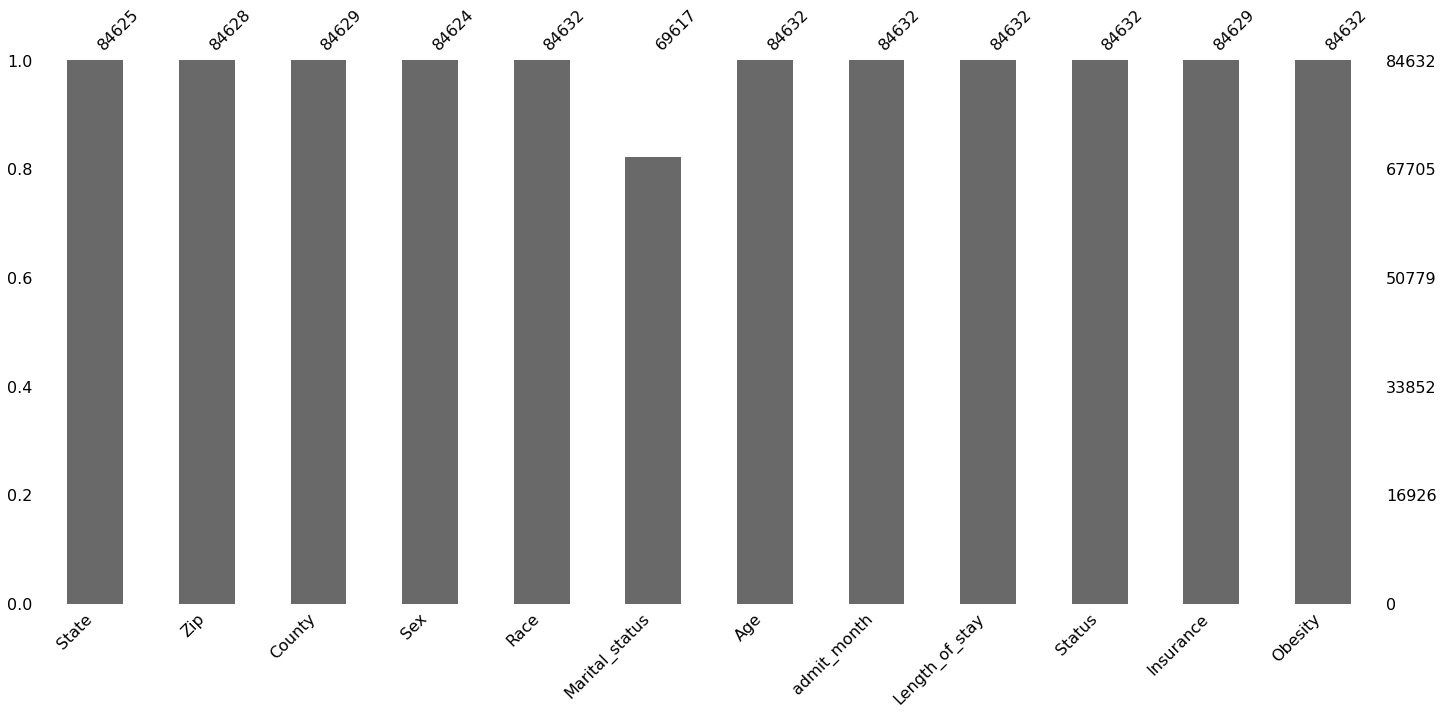

In [14]:
msno.bar(data.iloc[:,0:12]) 

In [33]:
data.isnull().sum()

State                                                                                                               7
Zip                                                                                                                 4
County                                                                                                              3
Sex                                                                                                                 8
Race                                                                                                                0
Marital_status                                                                                                  15015
Age                                                                                                                 0
admit_month                                                                                                         0
Length_of_stay                                          

In [34]:
data.isnull().sum()/len(data)*100

State                                                                                                            0.008271
Zip                                                                                                              0.004726
County                                                                                                           0.003545
Sex                                                                                                              0.009453
Race                                                                                                             0.000000
Marital_status                                                                                                  17.741516
Age                                                                                                              0.000000
admit_month                                                                                                      0.000000
Length_of_stay          

(84632, 63)

In [3]:
['Preeclampsia/Eclampsia'].value_counts()

0    79911
1     4721
Name: Preeclampsia/Eclampsia, dtype: int64

In [3]:
data.groupby(['Preeclampsia/Eclampsia'])['Obesity'].value_counts()

Preeclampsia/Eclampsia  Obesity
0                       0          73612
                        1           6299
1                       0           3884
                        1            837
Name: Obesity, dtype: int64

In [ ]:
data.groupby(['Preeclampsia/Eclampsia'])['Race'].value_counts()

In [4]:
data.groupby(['Preeclampsia/Eclampsia']).agg({'Obesity':['sum', lambda x: x.mean() *100],  
                                              'Diabetes':'sum', 
                                              'Marital_status': 'sum'})

TypeError: can only concatenate str (not "int") to str

In [16]:
test = data.groupby(['Preeclampsia/Eclampsia']).agg({'Obesity':['sum', 'mean'],
                                              'Diabetes':['sum','mean'],
                                               'Multiple Gestations':['sum','mean'],
                                               'Proteinuria':['sum','mean'],
                                               'Unspecified renal disease in pregnancy without mention of hypertension':['sum','mean'],
                                               'Infections of genitourinary tract in pregnancy':['sum','mean'],
                                              'Anxiety':['sum','mean'],
                                              'Other anemia':['sum','mean'],
                                             })

In [17]:
test

Obesity           Diabetes            \
                           sum      mean      sum      mean   
Preeclampsia/Eclampsia                                        
0                         6299  0.078825     5527  0.069164   
1                          837  0.177293      639  0.135353   

                       Multiple Gestations           Proteinuria            \
                                       sum      mean         sum      mean   
Preeclampsia/Eclampsia                                                       
0                                     1182  0.014791         114  0.001427   
1                                      211  0.044694          52  0.011015   

                       Unspecified renal disease in pregnancy without mention of hypertension  \
                                                                                          sum   
Preeclampsia/Eclampsia                                                                          
0                                                                     471                       
1                                                                      75                       

                                  \
                            mean   
Preeclampsia/Eclampsia             
0                       0.005894   
1                       0.015886   

                       Infections of genitourinary tract in pregnancy  \
                                                                  sum   
Preeclampsia/Eclampsia                                                  
0                                                                 540   
1                                                                  78   

                                 Anxiety           Other anemia            
                            mean     sum      mean          sum      mean  
Preeclampsia/Eclampsia                                                     
0                       0.006758    2887  0.036128        11904  0.148966  
1                       0.016522     261  0.055285          880  0.186401

In [41]:
data['Preeclampsia/Eclampsia'].value_counts()

0    79911
1     4721
Name: Preeclampsia/Eclampsia, dtype: int64

In [27]:
6299/len(data)

0.07442811229794877

In [4]:
data.Race.value_counts()

White              55815
Other/Unknown      14864
Black               8510
Native American     5443
Name: Race, dtype: int64

In [5]:
len(data)

84632

In [7]:
data.columns

Index(['State', 'Zip', 'County', 'Sex', 'Race', 'Marital_status', 'Age',
       'admit_month', 'Length_of_stay', 'Status',
       ...
       'Inadequate Prenatal Care', 'Periodontal disease', 'Intrauterine Death',
       'Preeclampsia/Eclampsia', 'HELLP', 'Stroke', 'Renal Disease',
       'Pulmonary Edema', 'Acute Heart Failure', 'Eclampsia'],
      dtype='object', length=109)

In [35]:
preMonth = data.groupby('admit_month')['Preeclampsia/Eclampsia'].sum()

In [37]:
preMonth

admit_month
1     412
2     331
3     384
4     356
5     450
6     381
7     405
8     441
9     394
10    394
11    383
12    390
Name: Preeclampsia/Eclampsia, dtype: int64

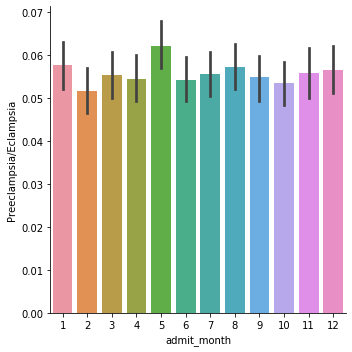

In [41]:
sns.catplot(x="admit_month", y="Preeclampsia/Eclampsia", kind="bar", data=data)

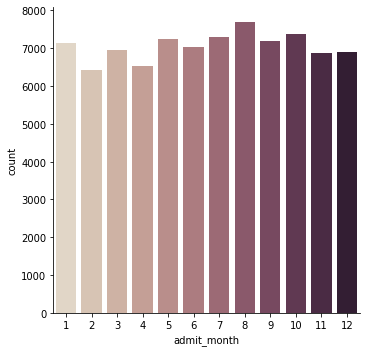

In [83]:
sns.catplot(x="admit_month", kind="count", palette="ch:.25", data=data)

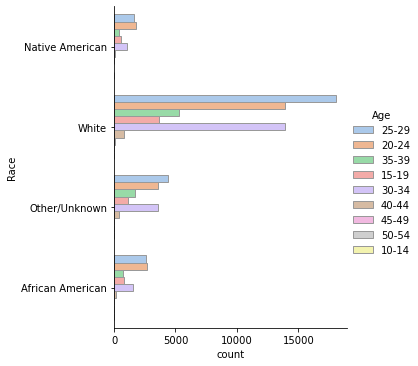

In [22]:
sns.catplot(y="Race", hue="Age", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

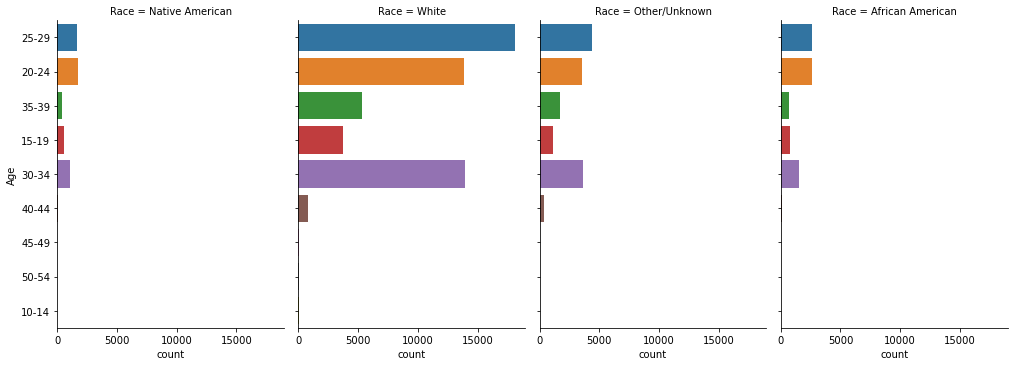

In [21]:
sns.catplot(y="Age",
            col="Race", aspect=.7,
            kind="count", data=data)

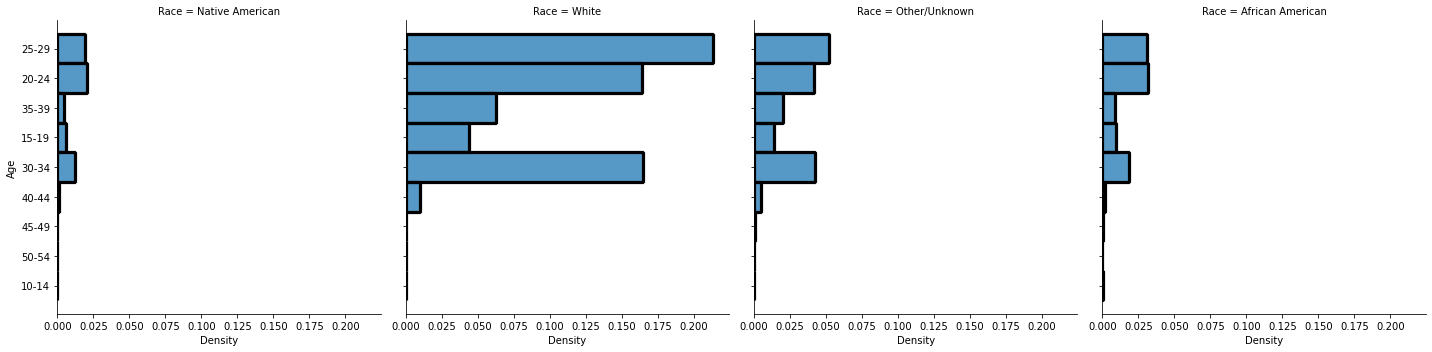

In [23]:
sns.displot(data, y="Age", stat="density", col='Race')

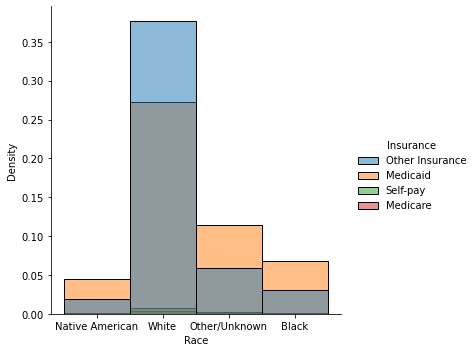

In [12]:
sns.displot(data,x='Race',hue="Insurance",stat='density' )

In [4]:
ageGroup = (data.groupby('Age')['Preeclampsia/Eclampsia'].sum())/data.Age.value_counts()*100

In [43]:
ageGroup.index

Index(['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54'],
      dtype='object')

In [54]:
data.Age.value_counts()

25-29    26708
20-24    21831
30-34    20115
35-39     8164
15-19     6192
40-44     1458
45-49       84
10-14       71
50-54        9
Name: Age, dtype: int64

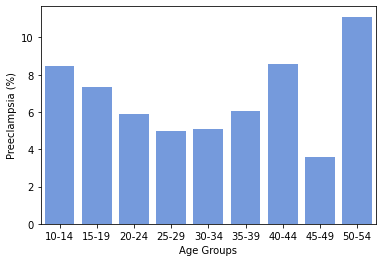

In [7]:
ax = sns.barplot(x=ageGroup.index, y=ageGroup.values, color='cornflowerblue')
ax.set(xlabel='Age Groups',ylabel='Preeclampsia (%)')
plt.savefig('agemapOklahoma.png', dpi=400, bbox_inches = "tight")

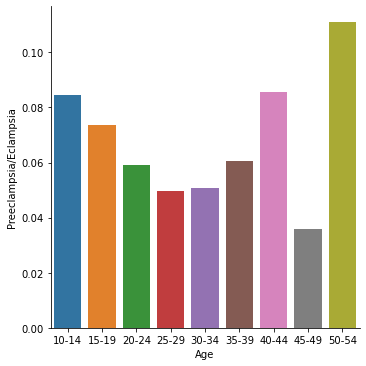

In [24]:
category_order = ['10-14', '15-19', '20-24', '25-29', '30-34','35-39','40-44','45-49','50-54']
figure = sns.catplot(x='Age',y='Preeclampsia/Eclampsia', data=data, kind='bar', ci=None,order=category_order)   
figure.savefig('agemapOklahoma.png', dpi=400, bbox_inches = "tight")

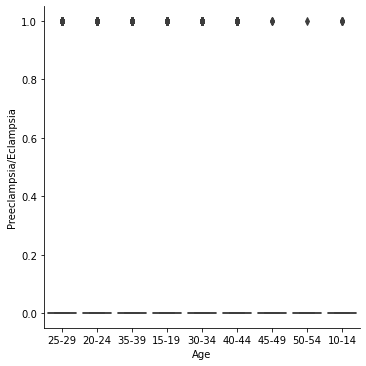

In [13]:
sns.catplot(x='Age',y ='Preeclampsia/Eclampsia', data=data, kind='box')

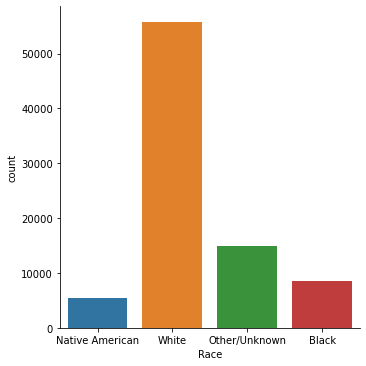

In [17]:
sns.catplot(x='Race', data=data, kind='count')

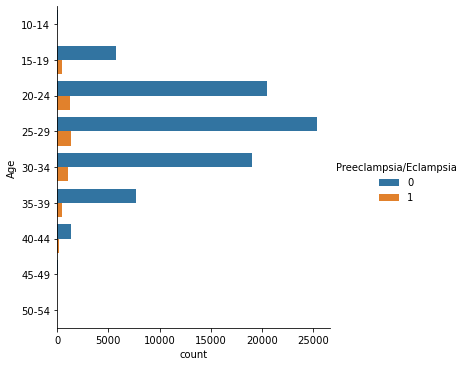

In [11]:
sns.catplot(y='Age',hue='Preeclampsia/Eclampsia', data=data, kind='count', order=category_order)

In [ ]:
sns.catplot(y='Age',hue='Preeclampsia/Eclampsia', data=data, kind='count', order=category_order)

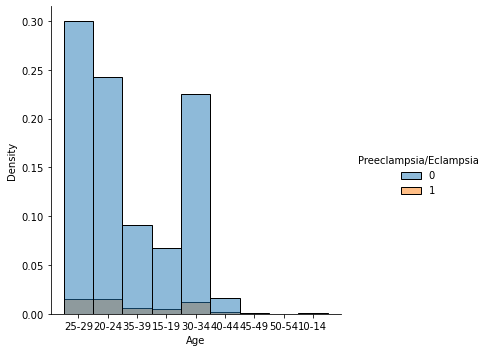

In [10]:
sns.displot(data,x='Age',hue="Preeclampsia/Eclampsia",stat='density')

In [16]:
sns.__version__

'0.10.1'

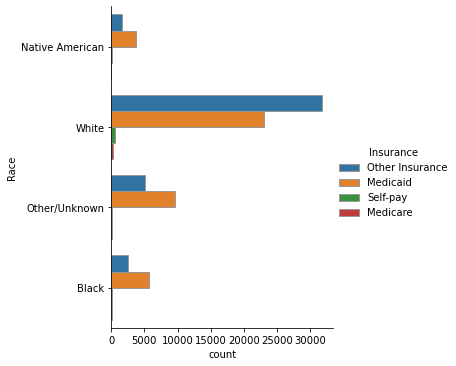

In [14]:
sns.catplot(y="Race", hue="Insurance", kind="count", edgecolor=".6",
            data=data)

In [57]:
Insurance = (data.groupby('Insurance')['Preeclampsia/Eclampsia'].sum())/data.Insurance.value_counts()*100

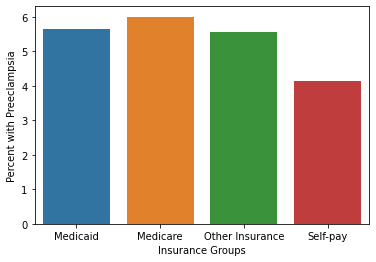

In [60]:
ax = sns.barplot(x=Insurance.index, y=Insurance.values)
ax.set(xlabel='Insurance Groups',ylabel='Percent with Preeclampsia')
plt.savefig('InsuranceOklahoma.png', dpi=400, bbox_inches = "tight")

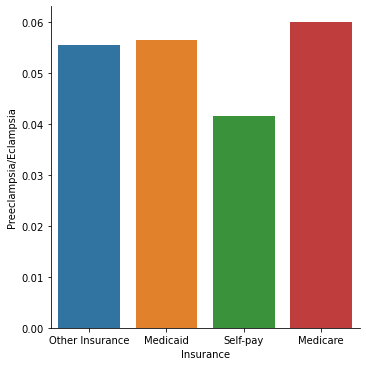

In [40]:
sns.catplot(x='Insurance', y='Preeclampsia/Eclampsia', kind='bar', data=data, ci=None)

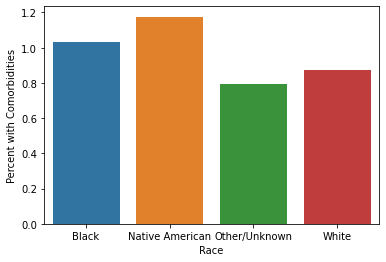

In [63]:
Insurance = (data.groupby('Race')['Comorbidities'].sum())/data.Race.value_counts()*100
ax = sns.barplot(x=Insurance.index, y=Insurance.values)
ax.set(xlabel='Race',ylabel='Percent with Comorbidities')
plt.savefig('ComorbiditiesOklahoma.png', dpi=400, bbox_inches = "tight")

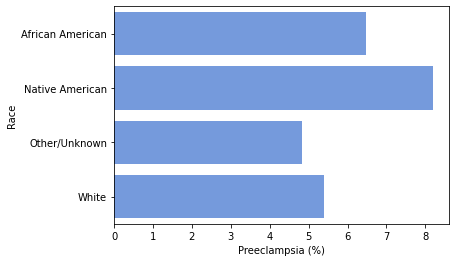

In [7]:
sns.set_palette("Blues_r")
Insurance = (data.groupby('Race')['Preeclampsia/Eclampsia'].sum())/data.Race.value_counts()*100
ax = sns.barplot(x=Insurance.values, y=Insurance.index, color='cornflowerblue')
ax.set(xlabel='Preeclampsia (%)',ylabel='Race')
plt.savefig('RacePreeclampsiaOklahoma.png', dpi=400, bbox_inches = "tight")

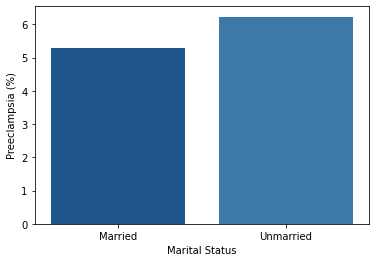

In [29]:
sns.set_palette("Blues_r")
marriage = (data.groupby('Marital_status')['Preeclampsia/Eclampsia'].sum())/data.Marital_status.value_counts()*100
ax = sns.barplot(x=marriage.index, y=marriage.values)
ax.set(xlabel='Marital Status',ylabel='Preeclampsia (%)')
plt.savefig('MSPreeclampsiaOklahoma.png', dpi=400, bbox_inches = "tight")

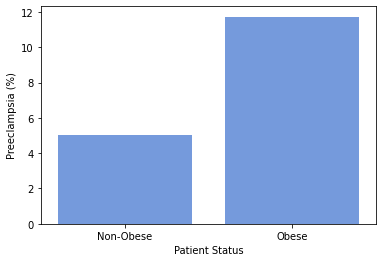

In [14]:
sns.set_palette("Blues_r")
Obesity = (data.groupby('Obesity')['Preeclampsia/Eclampsia'].sum())/data.Obesity.value_counts()*100
ax = sns.barplot(x=Obesity.index, y=Obesity.values, color='cornflowerblue')
ax.set(xlabel ='Patient Status',ylabel='Preeclampsia (%)')
ax.set_xticklabels(['Non-Obese','Obese'])
plt.savefig('ObesityPreeclampsiaOklahoma.png', dpi=400, bbox_inches = "tight")

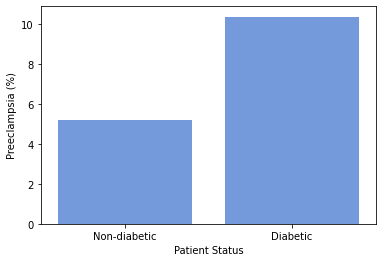

In [19]:
sns.set_palette("Blues_r")
Diabetes = (data.groupby('Diabetes')['Preeclampsia/Eclampsia'].sum())/data.Diabetes.value_counts()*100
ax = sns.barplot(x=Diabetes.index, y=Diabetes.values, color='cornflowerblue')
ax.set(xlabel ='Patient Status',ylabel='Preeclampsia (%)')
ax.set_xticklabels(['Non-diabetic','Diabetic'])
plt.savefig('DiabetesPreeclampsiaOklahoma.png', dpi=400, bbox_inches = "tight")

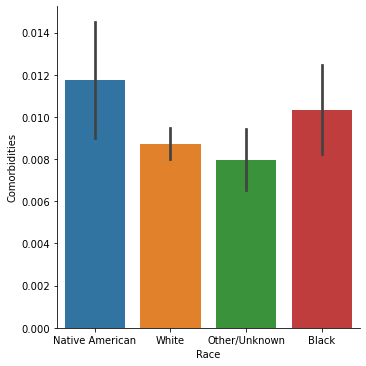

In [20]:
sns.catplot(x='Race', y='Comorbidities', kind='bar', data=data)

In [21]:
data.Race.value_counts()

White               55815
Other/Unknown       14864
African American     8510
Native American      5443
Name: Race, dtype: int64

In [19]:
# Comorbidities = HELP, Stroke, Renal Disease, Pulmonary Edema, Acute Heart Failure, and Eclampsia?
data.groupby('Race')['HELLP'].sum()

Race
African American     13
Native American      17
Other/Unknown        34
White               143
Name: HELLP, dtype: int64

In [13]:
test = data.groupby(['Race']).agg({'HELLP': lambda x: x.mean() *100,
                                    'Stroke':lambda x: x.mean() *100,
                                   'Pulmonary Edema': lambda x: x.mean() *100,
                                   'Acute Heart Failure' :lambda x: x.mean() *100,
                                   'Eclampsia': lambda x: x.mean() *100
                                             })

In [17]:
test

,HELLP,Stroke,Pulmonary Edema,Acute Heart Failure,Eclampsia
Race,,,,,
African American,0.152761,0.023502,0.023502,0.094007,0.246769
Native American,0.312328,0.018372,0.073489,0.000000,0.165350
Other/Unknown,0.228741,0.047094,0.013455,0.026911,0.121098
White,0.256204,0.019708,0.050166,0.026874,0.121831


In [22]:
data['Acute Heart Failure'].sum()

27

In [23]:
len(data)

84632

In [ ]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=test, kind="bar",
    x="Race", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")


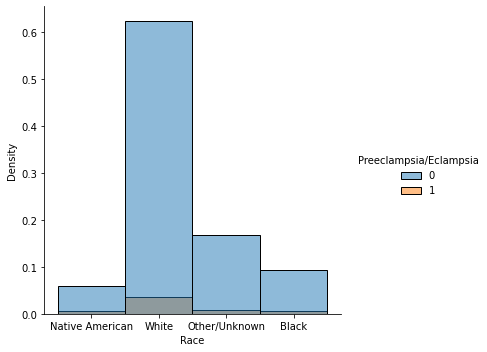

In [29]:
sns.displot(x='Race', hue='Preeclampsia/Eclampsia',kind='hist', data=data,stat='density')

In [39]:
# The method for race preeclampsia prevalance isn't going to work if I also want to chart the rate of preeclampsia 
# given comorbidities (diabetes and obesity) So I need to have an additional column marking rate per group. 
fig = plt.figure(figsize=(10,30))

for i, col in enumerate(data.columns):   
   # PERCENT COLUMN CALCULATION
   data[col+'_pct'] = data.groupby(['Preeclampsia/Eclampsia', col])[col].transform(lambda x: len(x)) / len(data)

   #plt.subplot(8, 2, i+1)   
   #sns.barplot(x=col, y=col+'_pct', hue='Preeclampsia/Eclampsia', data=data).set(xlabel=col, ylabel='Percent')    

ValueError: Length mismatch: Expected axis has 84625 elements, new values have 84632 elements

<Figure size 720x2160 with 0 Axes>

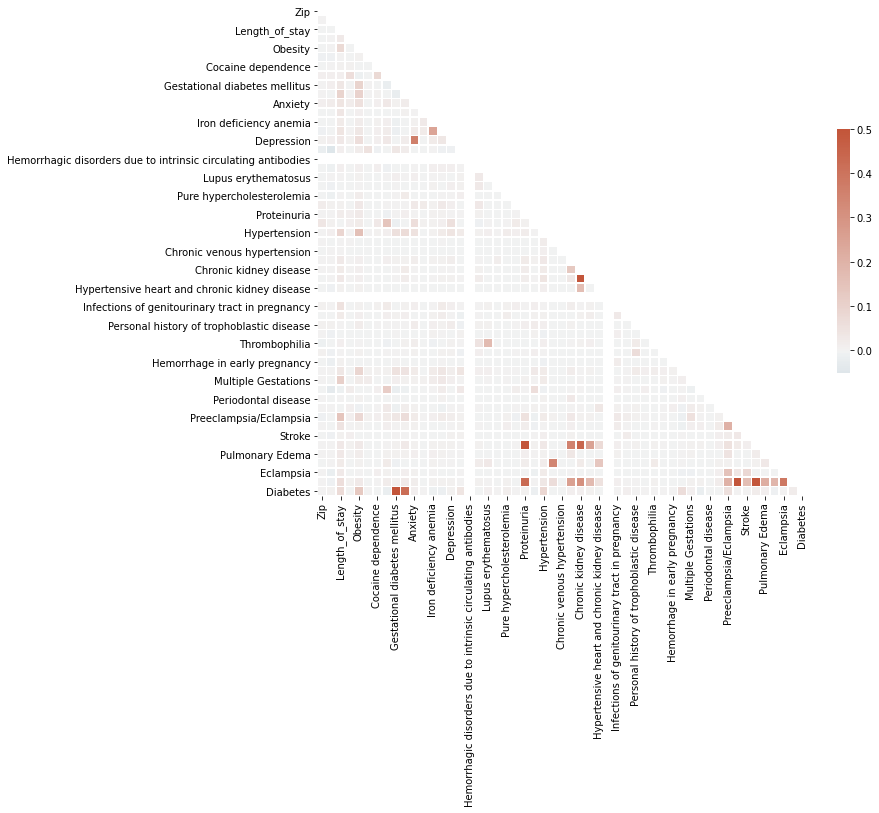

In [30]:
data.rename(columns = {"Other cardiovascular diseases complicating pregnancy and childbirth or the puerperium": "Other Cardiovascular diseases"},  
          inplace = True) 

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
svm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


figure = svm.get_figure()    
figure.savefig('heatmap3.png', dpi=400, bbox_inches = "tight")

In [64]:
RaceAge[['Black']].sum()

8510

In [69]:
RaceAge[['Black']]/(RaceAge[['Black']].sum())*100

Race   Age  
Black  20-24    31.175088
       25-29    30.540541
       30-34    18.437133
       15-19     9.576968
       35-39     8.566392
       40-44     1.457109
       10-14     0.117509
       45-49     0.082256
       50-54     0.047004
Name: Age, dtype: float64

In [72]:
RaceAge[['White']]/(RaceAge[['White']].sum())*100

Race   Age  
White  25-29    32.410642
       30-34    24.950282
       20-24    24.883992
       35-39     9.490280
       15-19     6.620084
       40-44     1.499597
       45-49     0.078832
       10-14     0.059124
       50-54     0.007167
Name: Age, dtype: float64

In [59]:
data.columns

Index(['State', 'Zip', 'County', 'Sex', 'Race', 'Marital_status', 'Age',
       'admit_month', 'Length_of_stay', 'Status',
       ...
       'Inadequate Prenatal Care', 'Periodontal disease', 'Intrauterine Death',
       'Preeclampsia/Eclampsia', 'HELLP', 'Stroke', 'Renal Disease',
       'Pulmonary Edema', 'Acute Heart Failure', 'Eclampsia'],
      dtype='object', length=109)

In [30]:
admitMonth = data['admit_month']

In [27]:
data.groupby('admit_month')['Preeclampsia/Eclampsia'].sum().sort_index()/data['admit_month'].value_counts().sort_index()*100

admit_month
1     5.763850
2     5.157370
3     5.527566
4     5.445923
5     6.213753
6     5.418859
7     5.548705
8     5.728017
9     5.485173
10    5.345272
11    5.573341
12    5.664488
dtype: float64

In [5]:
missing = data.iloc[:,0:15].isnull().sum()

In [6]:
missing/len(data)*100

State              0.008271
Zip                0.004726
County             0.003545
Sex                0.009453
Race               0.000000
Marital_status    17.741516
Age                0.000000
admit_month        0.000000
Length_of_stay     0.000000
Status             0.000000
pdx                0.000000
dx1                0.000000
dx2                0.122885
dx3               15.696191
dx4               33.262832
dtype: float64

In [6]:
data.groupby('Race')[['Preeclampsia/Eclampsia']].sum()

,Preeclampsia/Eclampsia
Race,
Black,551
Native American,446
Other/Unknown,716
White,3008


In [102]:
data.Race.value_counts()

White              55815
Other/Unknown      14864
Black               8510
Native American     5443
Name: Race, dtype: int64

In [100]:
missing

State                 7
Zip                   4
County                3
Sex                   8
Race                  0
Marital_status    15015
Age                   0
admit_month           0
Length_of_stay        0
Status                0
pdx                   0
dx1                   0
dx2                 104
dx3               13284
dx4               28151
dtype: int64

In [98]:
data.isnull().sum()

State                                                                                                               7
Zip                                                                                                                 4
County                                                                                                              3
Sex                                                                                                                 8
Race                                                                                                                0
Marital_status                                                                                                  15015
Age                                                                                                                 0
admit_month                                                                                                         0
Length_of_stay                                          

In [95]:
missing/len(data)*100

State              0.008271
Zip                0.004726
County             0.003545
Sex                0.009453
Race               0.000000
Marital_status    17.741516
Age                0.000000
admit_month        0.000000
Length_of_stay     0.000000
Status             0.000000
pdx                0.000000
dx1                0.000000
dx2                0.122885
dx3               15.696191
dx4               33.262832
dtype: float64

In [99]:
3/len(data)*100

0.003544758483788638

In [86]:
data[['Preeclampsia/Eclampsia']].sum()

Preeclampsia/Eclampsia    4721
dtype: int64

In [12]:
4721/len(data)*100

5.578268267322053

In [88]:
len(data)-4721

79911

In [85]:
data.groupby('Race')[['Acute Heart Failure', 'Pulmonary Edema', 'Renal Disease','Stroke','HELLP','Preeclampsia/Eclampsia']].sum()

,Acute Heart Failure,Pulmonary Edema,Renal Disease,Stroke,HELLP,Preeclampsia/Eclampsia
Race,,,,,,
Black,8,2,45,2,13,551
Native American,0,4,34,1,17,446
Other/Unknown,4,2,58,7,34,716
White,15,28,236,11,143,3008


In [79]:
data.Status.unique()

array([ 1.,  7.,  2., 70.,  6., 21., 61., 85., 86., 62., 65., 50.,  5.,
       81., 20., 51.,  3.,  4., 64., 95.])

In [74]:
data.Age.value_counts()

25-29    26708
20-24    21831
30-34    20115
35-39     8164
15-19     6192
40-44     1458
45-49       84
10-14       71
50-54        9
Name: Age, dtype: int64

In [44]:
26708/len(data)*100

31.557803195008983

In [106]:
data.admit_month.value_counts()/len(data)*100

8     9.097032
10    8.709472
7     8.624397
5     8.557047
9     8.487333
1     8.445978
6     8.307732
3     8.208479
12    8.135221
11    8.119860
4     7.724029
2     7.583420
Name: admit_month, dtype: float64

In [ ]:
data.iloc[:,45:62].sum()

In [66]:
sums = data.iloc[:,62:].sum()
freq = (sums/len(data)*100).round(4)

In [69]:
sums

Amphetamine dependence                                                                                            962
Gestational diabetes mellitus                                                                                    5025
Pre-existing diabetes mellitus                                                                                   1159
Anxiety                                                                                                          3148
Anemia NOS                                                                                                         11
Iron deficiency anemia                                                                                           1246
Other anemia                                                                                                    12784
Depression                                                                                                       2752
Primigravidas at the extremes of maternal age           

In [71]:
sums = sums.astype(str)
freq = freq.astype(str)
strings = '&' + sums + '  (' + freq + '\%) &'

In [83]:
for i in range(len(strings)):
    if i%2 == 1:
        strings[i] = strings[i] + '\\'

In [85]:
strings.head(20)

Amphetamine dependence                                                 &962  (1.1367\%) &
Gestational diabetes mellitus                                     &5025  (5.9375\%) &\\\\
Pre-existing diabetes mellitus                                        &1159  (1.3695\%) &
Anxiety                                                           &3148  (3.7196\%) &\\\\
Anemia NOS                                                               &11  (0.013\%) &
Iron deficiency anemia                                            &1246  (1.4723\%) &\\\\
Other anemia                                                        &12784  (15.1054\%) &
Depression                                                        &2752  (3.2517\%) &\\\\
Primigravidas at the extremes of maternal age                         &1796  (2.1221\%) &
Hemorrhagic disorders due to intrinsic circulating antibodies           &0  (0.0\%) &\\\\
Systemic lupus erythematosus                                           &141  (0.1666\%) &
Lupus eryt

In [10]:
sums = data.iloc[:,16:].sum()
freq = (sums/len(data)*100).round(4)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
           

ok2017.drop(columns=['State', 'Zip', 'Sex', 'County', 'Length_of_stay', 'Status', 'pdx',
                     'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7',
                     'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14',
                     'dx15', 'ppoa', 'poa1', 'poa2', 'poa3', 'poa4',
                     'poa5', 'poa6', 'poa7', 'poa8', 'poa9', 'poa10',
                     'poa11', 'poa12', 'poa13', 'poa14', 'poa15', 'ppx',
                     'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7',
                     'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14',
                     'px15', 'county name'], inplace=True)

ok2018.drop(columns=['State', 'Zip', 'Sex', 'County', 'Length_of_stay', 'Status', 'pdx',
                     'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7',
                     'dx8', 'dx9', 'dx10', 'dx11', 'dx12', 'dx13', 'dx14',
                     'dx15', 'ppoa', 'poa1', 'poa2', 'poa3', 'poa4',
                     'poa5', 'poa6', 'poa7', 'poa8', 'poa9', 'poa10',
                     'poa11', 'poa12', 'poa13', 'poa14', 'poa15', 'ppx',
                     'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7',
                     'px8', 'px9', 'px10', 'px11', 'px12', 'px13', 'px14',
                     'px15', 'county name'], inplace=True)

# Setting dummies to true makes a column for each category that states whether or not it is missing (0 or 1).
ok2017 = pd.get_dummies(ok2017, prefix_sep="__", dummy_na=True,
                        columns=['Race', 'Marital_status', 'Metro status'])

# Propogates the missing values via the indicator columns
ok2017.loc[ok2017["Race__nan"] == 1, ok2017.columns.str.startswith("Race__")] = np.nan
ok2017.loc[ok2017["Marital_status__nan"] == 1, ok2017.columns.str.startswith("Marital_status__")] = np.nan
ok2017.loc[ok2017["Metro status__nan"] == 1, ok2017.columns.str.startswith("Metro status__")] = np.nan

# Drops the missingness indicator columns
ok2017 = ok2017.drop(['Race__nan'], axis=1)
ok2017 = ok2017.drop(['Marital_status__nan'], axis=1)
ok2017 = ok2017.drop(['Metro status__nan'], axis=1)

# Setting dummies to true makes a column for each category that states whether or not it is missing (0 or 1).
ok2018 = pd.get_dummies(ok2018, prefix_sep="__", dummy_na=True,
                        columns=['Race', 'Marital_status', 'Metro status'])

# Propogates the missing values via the indicator columns
ok2018.loc[ok2018["Race__nan"] == 1, ok2018.columns.str.startswith("Race__")] = np.nan
ok2018.loc[ok2018["Marital_status__nan"] == 1, ok2018.columns.str.startswith("Marital_status__")] = np.nan
ok2018.loc[ok2018["Metro status__nan"] == 1, ok2018.columns.str.startswith("Metro status__")] = np.nan

# Drops the missingness indicator columns
ok2018 = ok2018.drop(['Race__nan'], axis=1)
ok2018 = ok2018.drop(['Marital_status__nan'], axis=1)
ok2018 = ok2018.drop(['Metro status__nan'], axis=1)

ok2017.rename(columns={'Race__White': 'White',
                       'Race__Native American': 'Native American',
                       'Race__Black': 'Black',
                       'Race__Other/Unknown': 'Other/Unknown Race',
                       'Marital_status__Married': 'Married',
                       'Marital_status__Unmarried': 'Unmarried',
                       'Metro status__Rural': 'Rural',
                       'Metro status__Urban': 'Urban'}, inplace=True)

ok2018.rename(columns={'Race__White': 'White',
                       'Race__Native American': 'Native American',
                       'Race__Black': 'Black',
                       'Race__Other/Unknown': 'Other/Unknown Race',
                       'Marital_status__Married': 'Married',
                       'Marital_status__Unmarried': 'Unmarried',
                       'Metro status__Rural': 'Rural',
                       'Metro status__Urban': 'Urban'}, inplace=True)

if (dropMetro == True):
    ok2017.drop(columns=['Rural', 'Urban'], inplace=True)
    ok2018.drop(columns=['Rural', 'Urban'], inplace=True)

#ok2017.to_csv('Data/Oklahoma_Clean/ok2017_Incomplete.csv', index=False)
#ok2018.to_csv('Data/Oklahoma_Clean/ok2018_Incomplete.csv', index=False)